## 3. Clasificación de caracteres manuscritos (OCR) (2 puntos)

En este apartado entrenaremos una red neuronal para que aprenda a clasificar automáticamente imágenes de dígitos escritos a mano. Este es un ejemplo de OCR (Optical Character Recognition) que utilizan empresas como Correos para interpretar automáticamente los datos de remitente escritos a mano en el sobre, previamente capturados con una cámara.

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np

%matplotlib inline

## 3.1. Carga de datos

Usaremos la base de datos **MNIST**, muy usada en Machine Learning para poner a prueba algoritmos. A continuación la cargamos:

In [27]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255. # reescalado de datos para que los datos de píxeles vayan de 0 a 1
y = y.astype(int) # las etiquetas leídas son de tipo str: las convertimos a int

In [28]:
print(type(X))
print(X.shape)
print(type(y))
print(y.shape)

print(y[:10])

<class 'numpy.ndarray'>
(70000, 784)
<class 'numpy.ndarray'>
(70000,)
[5 0 4 1 9 2 1 3 1 4]


In [29]:
n_clases = len(np.unique(y))
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X.min(), X.max()

(52500, 784)
(52500,)
(17500, 784)
(17500,)


(0.0, 1.0)

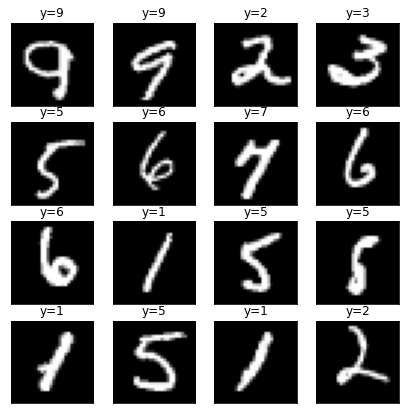

In [31]:
plt.figure(figsize=(7,7))
primero = 5000
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[primero+i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title("y={}".format(y_train[primero+i]))
    plt.xticks([])
    plt.yticks([])

## 3.2. Construcción del modelo

### 3.2.1. Árbol de decisión

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
# Rellena esta casilla con código para crear y entrenar
# un objeto de nombre DT y clase DecisionTreeClassifier
# La profundidad máxima deberá ser ajustada en 7

DT = DecisionTreeClassifier(criterion='entropy', max_depth=7)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

Calcula en la siguiente casilla los scores en training y test.

In [34]:
print("Score train: {:.2f}".format(DT.score(X_train, y_train)))
print("Score test: {:.2f}".format(DT.score(X_test, y_test)))

Score train: 0.82
Score test: 0.80


Calcula en la siguiente casilla la matriz de confusión en test. ¿Qué dígitos confunde más?

In [35]:
from sklearn.metrics import confusion_matrix

predictions = DT.predict(X_test)
confusion = confusion_matrix(y_test, predictions)
print(confusion)
max_index = (0,0)
max_value = 0
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        if i != j and confusion[i][j] > max_value:
            max_value = confusion[i][j]
            max_index = (i,j)
print()
print('Most confused digits are {} and {}: {} times'.format(max_index[0], max_index[1], max_value))

[[1505    2   18   15   39   37   13   38   33   22]
 [   1 1897   24   25    6    9   11   12   19    3]
 [  44   55 1354   66   62   28   62   40   73   15]
 [  30   33   58 1366   17  138   23   23   48   52]
 [   9   29   24   18 1280   42   23   25   38  202]
 [  51   52   22  157   35 1171   52   13   41   28]
 [  50   18   55   12   80   46 1339    2   52   15]
 [   5   15   35   12   38   11    2 1535   31  114]
 [  15   72   47   39   76   52   36    8 1289   74]
 [  30   10   14   62  111   71   15   44   32 1308]]

Most confused digits are 4 and 9: 202 times


### 3.2.2. Regresión Logística

In [36]:
from sklearn.linear_model import LogisticRegression

# Rellena esta casilla con código para crear y entrenar
# un objeto de nombre LR y clase LogisticRegression

LR = LogisticRegression(max_iter=300)
LR.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

Calcula en la siguiente casilla los scores en training y test.

Calcula en la siguiente casilla la matriz de confusión en test. ¿Qué dígitos confunde más?

In [ ]:
LR.classes_

In [ ]:
LR.coef_.shape

A continuación se representan gráficamente los pesos aprendidos.

¿Puedes decir algo acerca de qué ha aprendido a identificar la regresión logística en las imágenes?

In [ ]:
# Representación gráfica de los coeficientes de la regresión logística

min_wij = LR.coef_.min()
max_wij = LR.coef_.max()

c = max([abs(min_wij), abs(max_wij)]) # factor de escala para visualización

plt.figure(figsize=(20,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    # pesos capa de entrada -> neurona i de la capa oculta
    coefs = LR.coef_[i]
    # los representamos gráficamente en una escala azul-blanco-rojo donde
    # rojo=positivo, azul=negativo y blanco=0
    plt.imshow(coefs.reshape(28, 28), cmap=plt.cm.bwr, vmin=-.5*c, vmax=.5*c)
    # plt.colorbar()  # si quisiésemos ver los códigos de color
    plt.title("Clase {}".format(LR.classes_[i]), fontsize=16)
    plt.xticks([])
    plt.yticks([])

¿Cuántos parámetros ajusta en total el fit de la regresión logística, de acuerdo a sus campos **coef_** e **intercept_**? Calcula este número a mano y confirma que te da la misma cantidad.

### 3.2.3. Red neuronal

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Rellena esta casilla con código para crear y entrenar
# un objeto de nombre MLP y clase MLPClassifier
# El número de capas ocultas será 1, y el número de neuronas
# ocultas deberá ajustarse dentro del rango [1,100]



Calcula en la siguiente casilla los scores en training y test.

Calcula en la siguiente casilla la matriz de confusión en test. ¿Qué dígitos confunde más?

- Dibuja la evolución del loss en entrenamiento en función del número de épocas.

- ¿Tiene una forma consistente con lo que uno se esperaría en teoría?

- Según la forma de la curva, ¿ha convergido el aprendizaje del modelo?

¿Cuántos parámetros ajusta en total el fit de la red neuronal, de acuerdo a sus campos **coefs_** e **intercepts_**? Calcula este número a mano y confirma que te da la misma cantidad.

### Análisis gráfico de los pesos de la conexión capa entrada -> capa oculta

A continuación se representan gráficamente los pesos aprendidos. ¿Puedes decir algo acerca de lo que están aprendiendo las neuronas de la capa oculta?

In [ ]:
min_wij = MLP.coefs_[0].min()
max_wij = MLP.coefs_[0].max()

c = max([abs(min_wij), abs(max_wij)]) # factor de escala para visualización

ncols = 7 # número de columnas en la figura
nrows = int(np.ceil(n_hidden/ncols)) # número de filas en la figura
plt.figure(figsize=(15,15*nrows/ncols))
for i in range(n_hidden):
    plt.subplot(nrows, ncols, i+1)
    # pesos capa de entrada -> neurona i de la capa oculta
    coefs = MLP.coefs_[0][:,i]
    # los representamos gráficamente en una escala azul-blanco-rojo donde
    # rojo=positivo, azul=negativo y blanco=0
    plt.imshow(coefs.reshape(28, 28), cmap=plt.cm.bwr, vmin=-.5*c, vmax=.5*c)
    # plt.colorbar()  # si quisiésemos ver los códigos de color
    plt.title("neurona {}".format(i))
    plt.xticks([])
    plt.yticks([])

## 3.3. Conclusiones

De los modelos que has construido, ¿cuál es el mejor? ¿por qué?